In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [2]:
%matplotlib inline

In [3]:
full_data = pd.read_csv("data/train.csv", sep=",")
full_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
!cat data/data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM


* Utilities - Check skewness
* Landslope - Skewness
* Condition2 - Check if most are 'Normal' - Check if it can be clubbed with condition1
* OverallQual - Check Significance
* OverallCond - Check sig
* YearBuilt + YearRemodAdd + Overallcond - General age + quality of the house
* RoofMat - Check corr with overallQual
* Exterior1st - Check corr with overallQual
* Exterior2nd - Check availability of data
* ExteriorQual + OverallQual check?
* ExterCond - Check significance. Can be clubbed with interior cond or over condition
* Foundation - Check significance
* BasementQual + BasementCond - Check skew and significance
* Bsmt - Check all vars
* HeatingQC - Overall cond
* KitchenQual - Overall quality
* Bedroom, TotRmsAbvGrd - Combined: Bedrooms per room
* GarageCars, GarageArea - Can be combined
* GarageQual - Overall Qual
* GarageQual + GarageCond - Check relation
* PoolQC, FenceQC
* MiscVal
* MoSold, YrSold

In [5]:
X = full_data.drop("SalePrice", axis=1).drop("Id", axis=1)
Y = full_data["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
description = pd.DataFrame(X_train.describe())
description

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1168.000000,951.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1162.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.849315,70.343849,10689.642123,6.121575,5.584760,1970.965753,1984.897260,103.771945,446.023973,45.152397,...,476.273973,95.946918,49.578767,21.839041,3.812500,15.407534,2.955479,51.267123,6.356164,2007.818493
std,42.531862,24.897021,10759.366198,1.367619,1.116062,30.675495,20.733955,173.032238,459.070977,158.217499,...,211.095373,129.685939,69.433580,62.083227,31.519664,55.881148,41.648504,553.039684,2.670707,1.322639
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7587.250000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,...,341.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,70.000000,9600.000000,6.000000,5.000000,1972.000000,1994.000000,0.000000,384.500000,0.000000,...,482.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11700.000000,7.000000,6.000000,2001.000000,2004.000000,166.000000,721.000000,0.000000,...,576.000000,168.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,5644.000000,1127.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 79 columns):
MSSubClass       1168 non-null int64
MSZoning         1168 non-null object
LotFrontage      951 non-null float64
LotArea          1168 non-null int64
Street           1168 non-null object
Alley            74 non-null object
LotShape         1168 non-null object
LandContour      1168 non-null object
Utilities        1168 non-null object
LotConfig        1168 non-null object
LandSlope        1168 non-null object
Neighborhood     1168 non-null object
Condition1       1168 non-null object
Condition2       1168 non-null object
BldgType         1168 non-null object
HouseStyle       1168 non-null object
OverallQual      1168 non-null int64
OverallCond      1168 non-null int64
YearBuilt        1168 non-null int64
YearRemodAdd     1168 non-null int64
RoofStyle        1168 non-null object
RoofMatl         1168 non-null object
Exterior1st      1168 non-null object
Exterior2nd      1168 non

In [8]:
all_cols = X_train.columns
object_cols = X_train.select_dtypes(include=["object"])
not_object_cols = list(set(all_cols) - set(object_cols))

for key in object_cols:
    print(key)
    print(X_train[key].value_counts())
    print("-"*50)

MSZoning
RL         924
RM         172
FV          53
RH          15
C (all)      4
Name: MSZoning, dtype: int64
--------------------------------------------------
Street
Pave    1164
Grvl       4
Name: Street, dtype: int64
--------------------------------------------------
Alley
Grvl    44
Pave    30
Name: Alley, dtype: int64
--------------------------------------------------
LotShape
Reg    729
IR1    394
IR2     37
IR3      8
Name: LotShape, dtype: int64
--------------------------------------------------
LandContour
Lvl    1059
Bnk      48
HLS      35
Low      26
Name: LandContour, dtype: int64
--------------------------------------------------
Utilities
AllPub    1167
NoSeWa       1
Name: Utilities, dtype: int64
--------------------------------------------------
LotConfig
Inside     822
Corner     221
CulDSac     84
FR2         38
FR3          3
Name: LotConfig, dtype: int64
--------------------------------------------------
LandSlope
Gtl    1108
Mod      51
Sev       9
Name: LandS

#### Uniform
* Neighborhood
* HouseStyle
* Exterior1st
* Exterior2nd
* MasVnrType
* Foundation(2 categories)
* BsmtQual (2 categories)
* BsmtFinType1


* BsmtExposure
* HeatingQC
* KitchenQual
* FireplaceQu
* GarageType
* GarageFinish

#### Skewed
* MSZoning - Skewed to RL - Check significance
* Street -  Skewed to Pave - Check sig
* LotShape - IR2, IR3 few vals
* LandContour - Skewed Lvl
* Utilities - Skewed AllPub. Only 1 NoSeWa
* LotConfig - Skewed
* LandSlope - skewed
* Condition1 - skewed
* Condition2 - Highly skewed
* ExtrQual
* ExtrCond
* BsmtCond
* BsmtFinType2
* Heating
* CentralAir
* Electrical
* Functional
* GarageQual
* PavedDrive
* SaleType
* SaleCondition

#### Too few values
* Alley - Too few values(50+41)
* PoolQC
* Fence
* MiscFeature



MSZoning


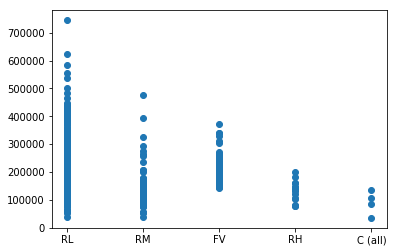

--------------------------------------------------
Street


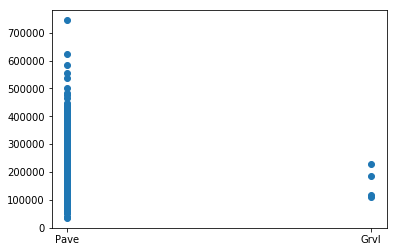

--------------------------------------------------
Alley
x and y must be the same size
Unable to plot
--------------------------------------------------
LotShape


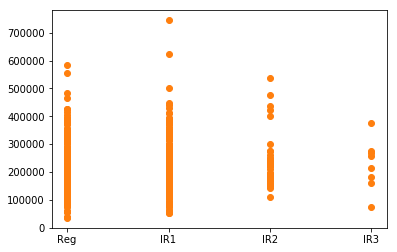

--------------------------------------------------
LandContour


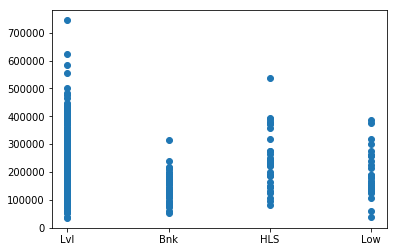

--------------------------------------------------
Utilities


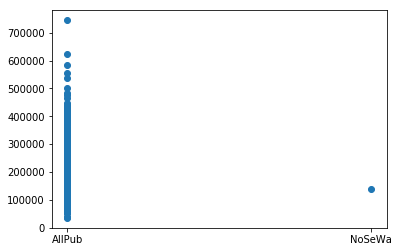

--------------------------------------------------
LotConfig


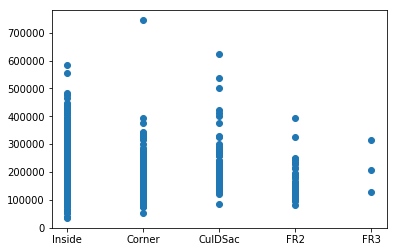

--------------------------------------------------
LandSlope


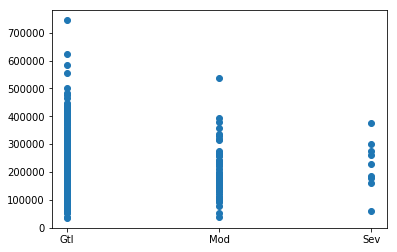

--------------------------------------------------
Neighborhood


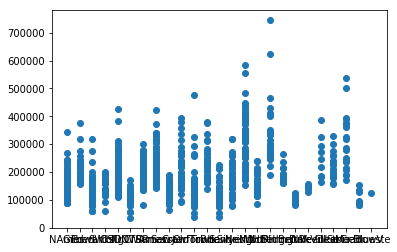

--------------------------------------------------
Condition1


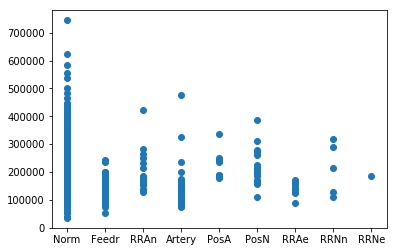

--------------------------------------------------
Condition2


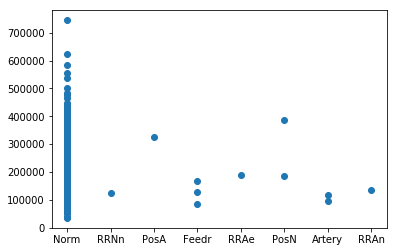

--------------------------------------------------
BldgType


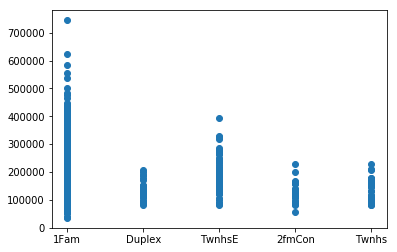

--------------------------------------------------
HouseStyle


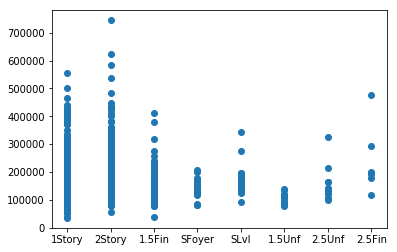

--------------------------------------------------
RoofStyle


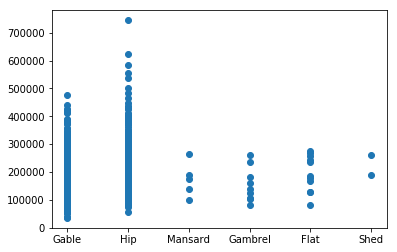

--------------------------------------------------
RoofMatl


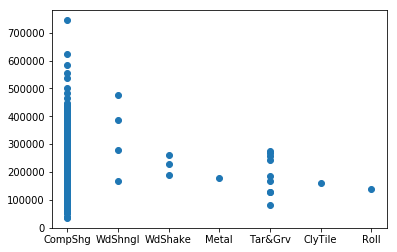

--------------------------------------------------
Exterior1st


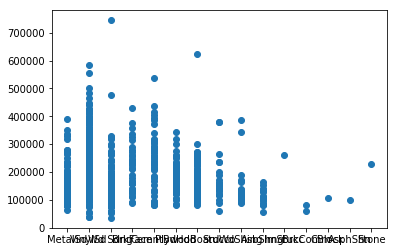

--------------------------------------------------
Exterior2nd


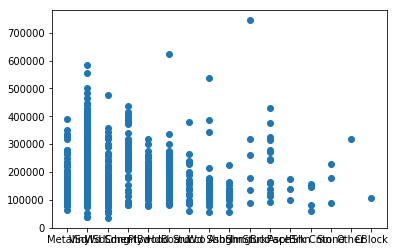

--------------------------------------------------
MasVnrType
x and y must be the same size
Unable to plot
--------------------------------------------------
ExterQual


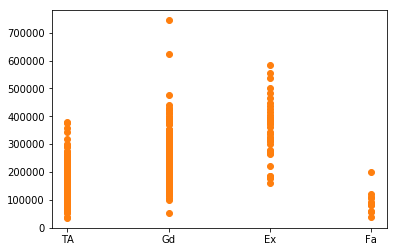

--------------------------------------------------
ExterCond


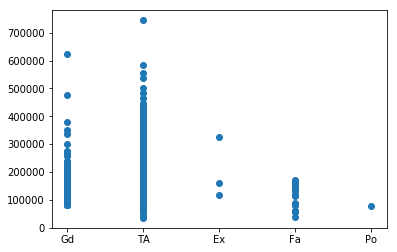

--------------------------------------------------
Foundation


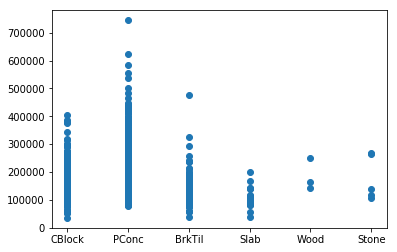

--------------------------------------------------
BsmtQual
x and y must be the same size
Unable to plot
--------------------------------------------------
BsmtCond
x and y must be the same size
Unable to plot
--------------------------------------------------
BsmtExposure
x and y must be the same size
Unable to plot
--------------------------------------------------
BsmtFinType1
x and y must be the same size
Unable to plot
--------------------------------------------------
BsmtFinType2
x and y must be the same size
Unable to plot
--------------------------------------------------
Heating


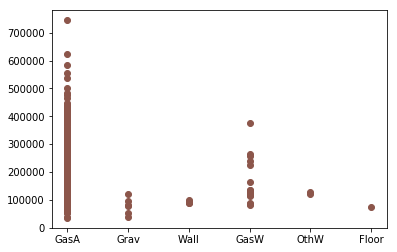

--------------------------------------------------
HeatingQC


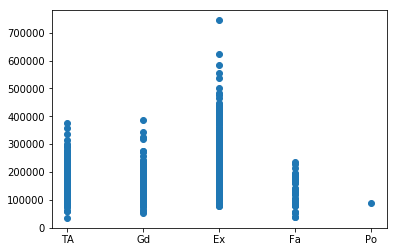

--------------------------------------------------
CentralAir


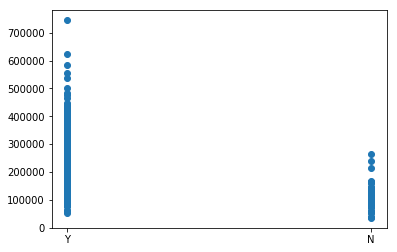

--------------------------------------------------
Electrical
x and y must be the same size
Unable to plot
--------------------------------------------------
KitchenQual


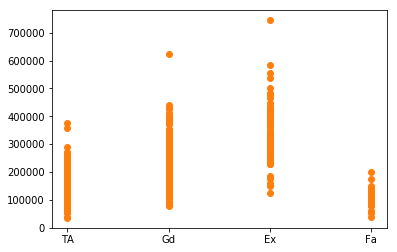

--------------------------------------------------
Functional


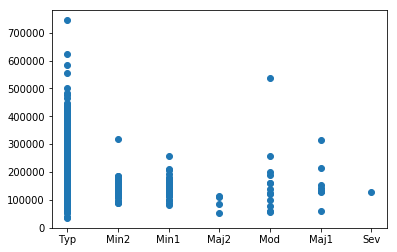

--------------------------------------------------
FireplaceQu
x and y must be the same size
Unable to plot
--------------------------------------------------
GarageType
x and y must be the same size
Unable to plot
--------------------------------------------------
GarageFinish
x and y must be the same size
Unable to plot
--------------------------------------------------
GarageQual
x and y must be the same size
Unable to plot
--------------------------------------------------
GarageCond
x and y must be the same size
Unable to plot
--------------------------------------------------
PavedDrive


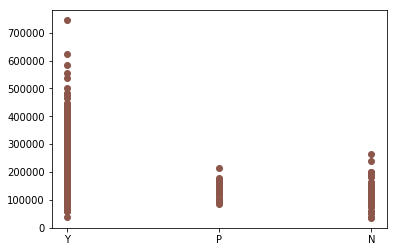

--------------------------------------------------
PoolQC
x and y must be the same size
Unable to plot
--------------------------------------------------
Fence
x and y must be the same size
Unable to plot
--------------------------------------------------
MiscFeature
x and y must be the same size
Unable to plot
--------------------------------------------------
SaleType


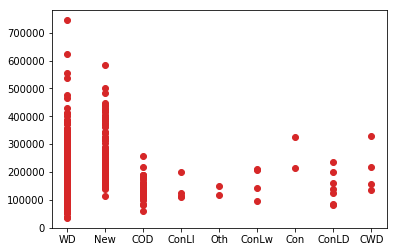

--------------------------------------------------
SaleCondition


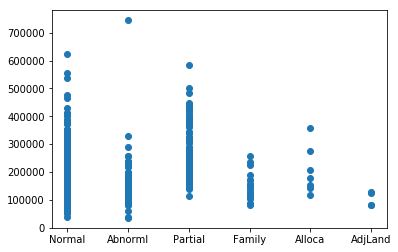

--------------------------------------------------


In [9]:
for key in object_cols:
    print(key)
    try:
        plt.scatter(X_train[key].dropna(), y_train)
        plt.show()
    except Exception as e:
        print(e)
        print("Unable to plot")
    print("-"*50)

#### Observations
**Skewed**
* Street
* Alley
* Utilities
* Condition2
* RoofStyle
* RoofMat

**Check**
* MSZoning
* LotShape
* LandContour
* LotConfig
* LandSlope
* Condition1
* Exterior1st
* Exterior2nd
* KitchenQual

**Use**
* Neighborhood
* BldgType
* HouseStyle



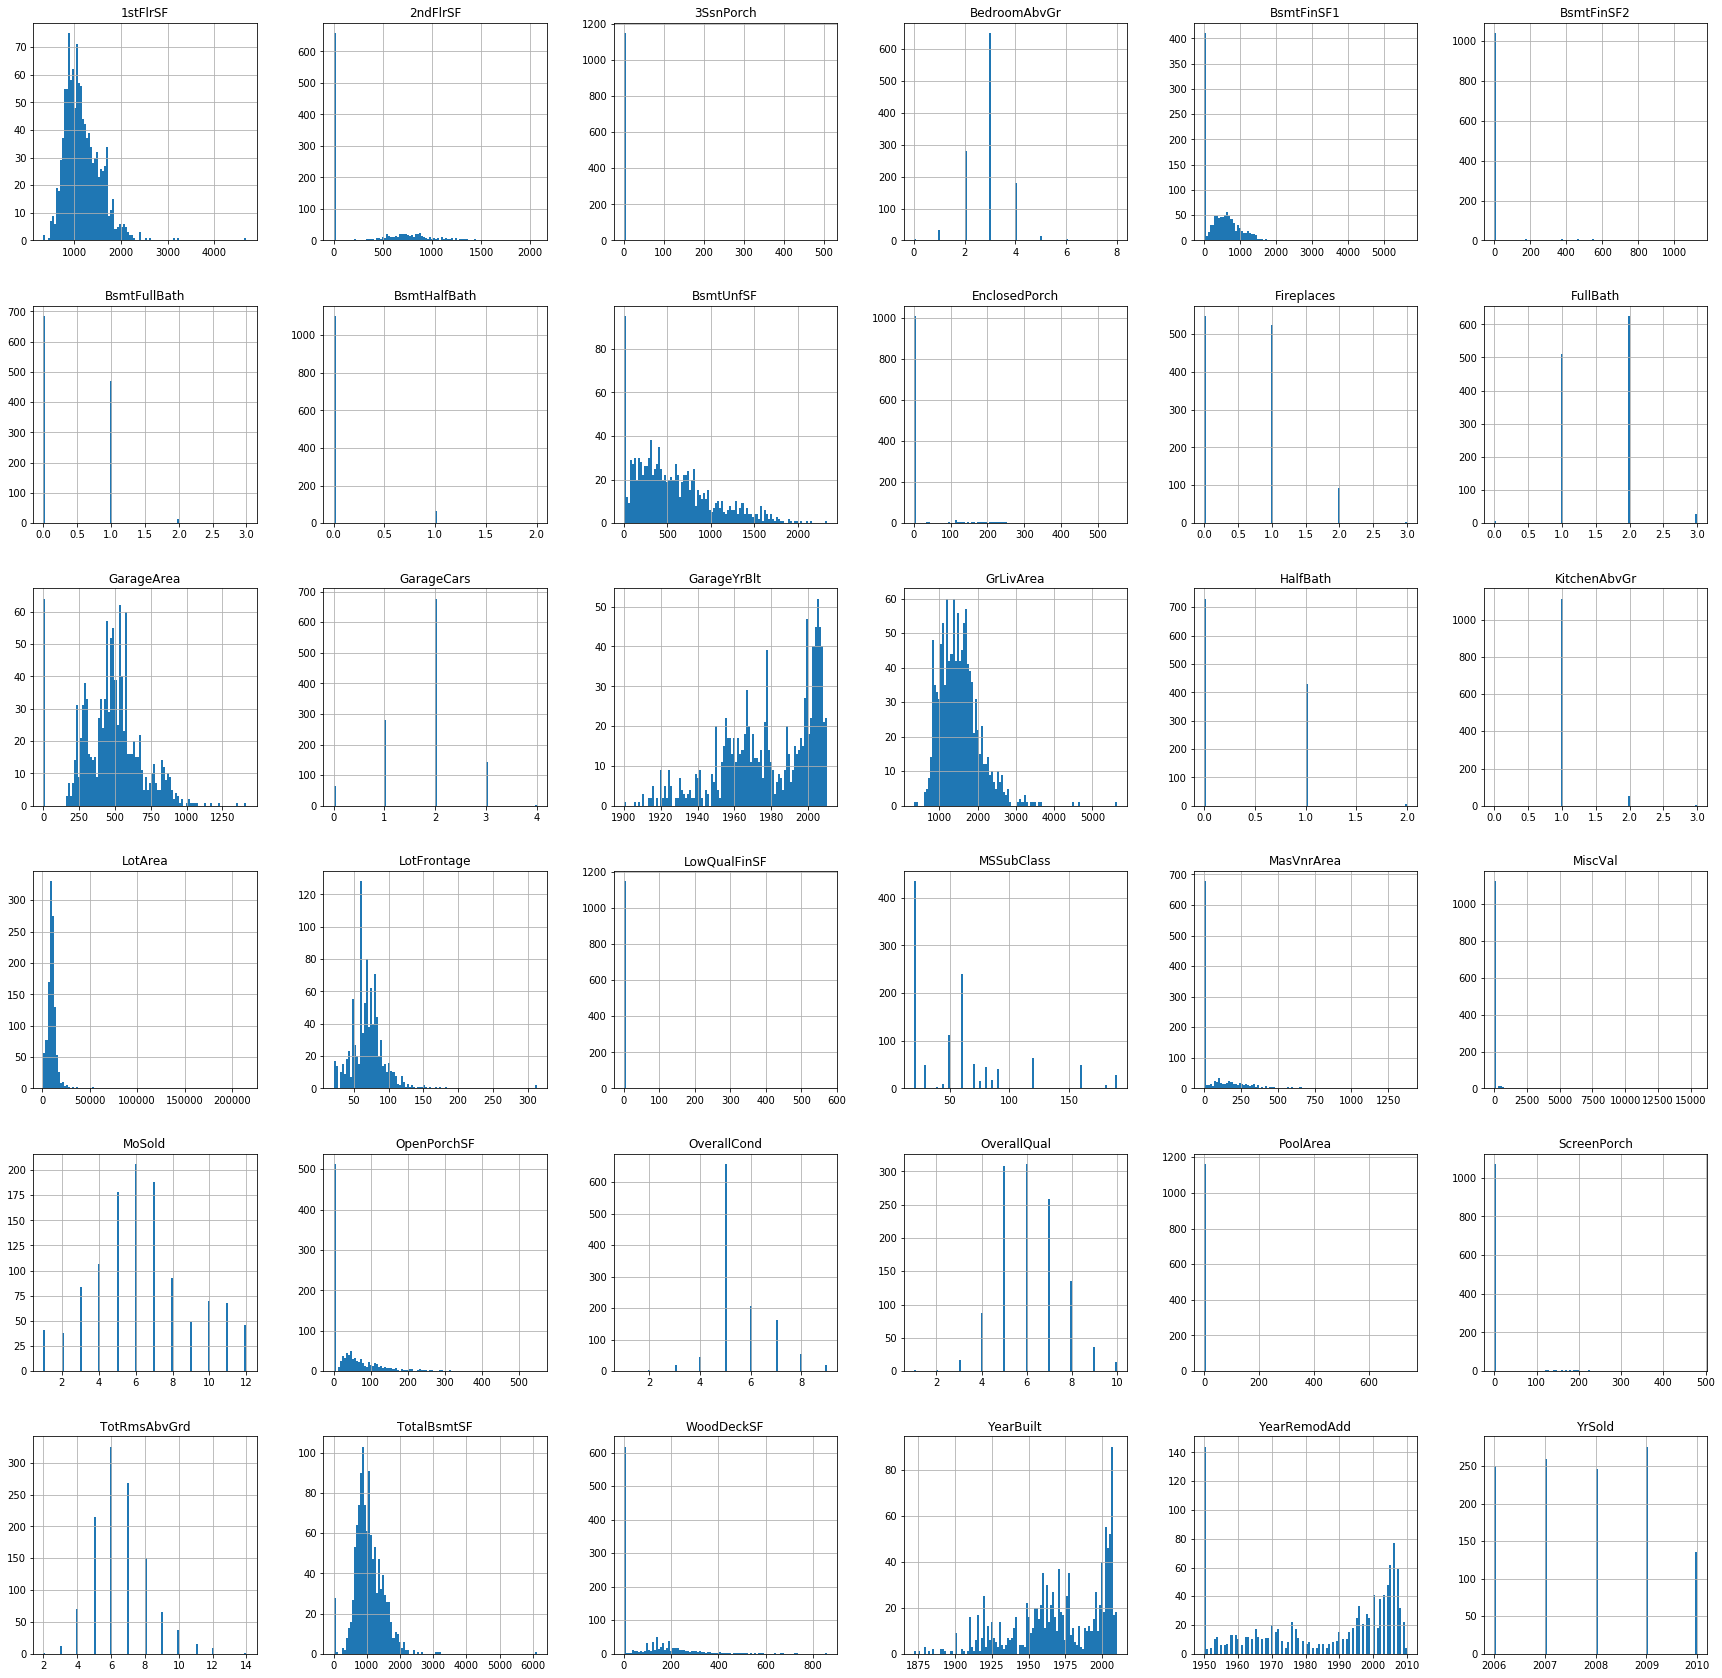

In [10]:

import matplotlib.pyplot as plt

X_train[not_object_cols].hist(bins=100, figsize=(30,30))
plt.show()

#### Scatter plots

2ndFlrSF


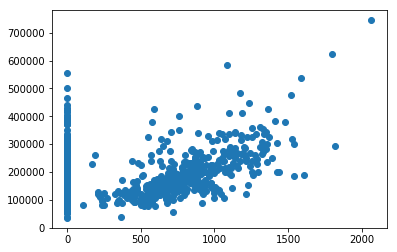

--------------------------------------------------
GrLivArea


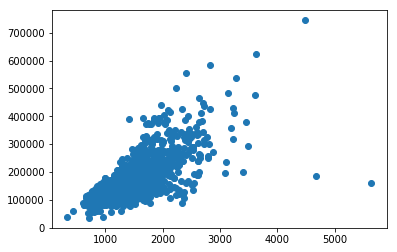

--------------------------------------------------
FullBath


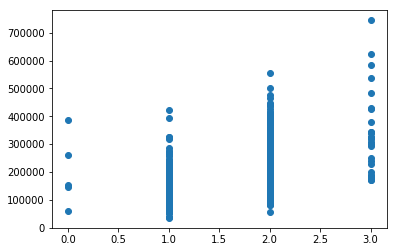

--------------------------------------------------
BedroomAbvGr


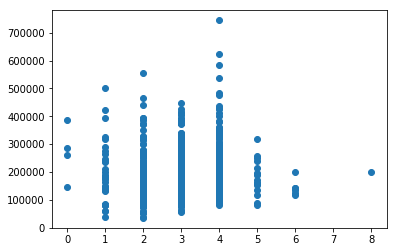

--------------------------------------------------
MiscVal


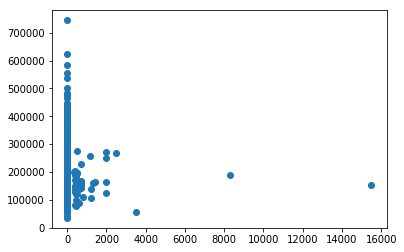

--------------------------------------------------
LotArea


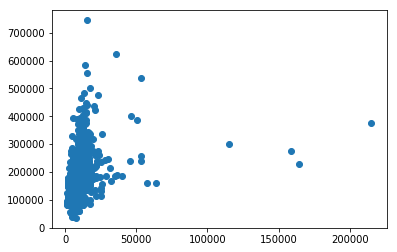

--------------------------------------------------
PoolArea


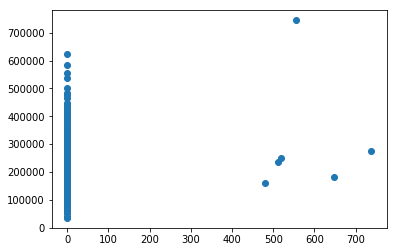

--------------------------------------------------
MasVnrArea


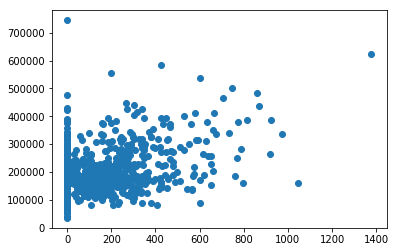

--------------------------------------------------
OpenPorchSF


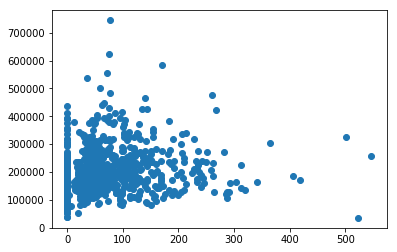

--------------------------------------------------
YearBuilt


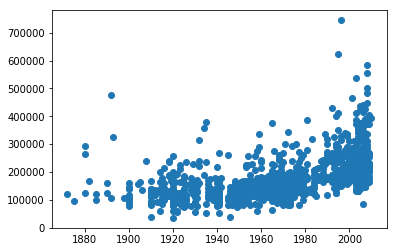

--------------------------------------------------
1stFlrSF


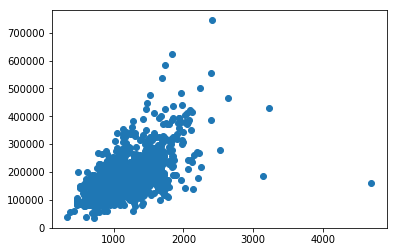

--------------------------------------------------
OverallQual


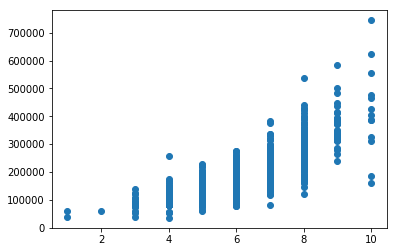

--------------------------------------------------
WoodDeckSF


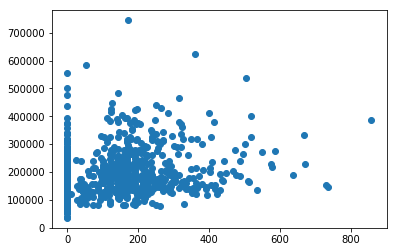

--------------------------------------------------
MoSold


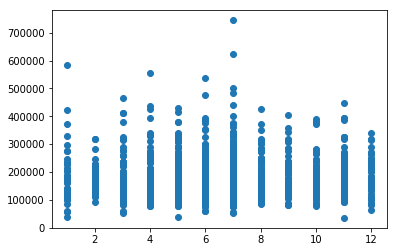

--------------------------------------------------
BsmtHalfBath


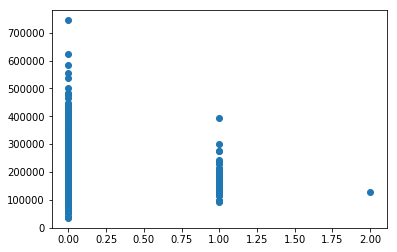

--------------------------------------------------
KitchenAbvGr


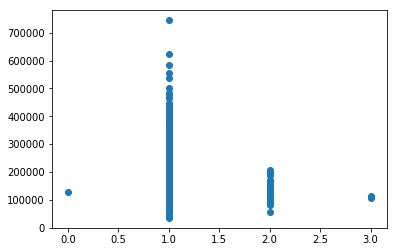

--------------------------------------------------
TotalBsmtSF


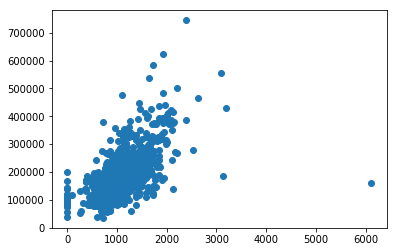

--------------------------------------------------
LowQualFinSF


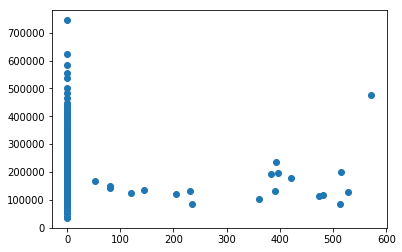

--------------------------------------------------
GarageYrBlt


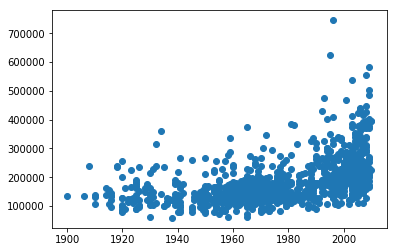

--------------------------------------------------
EnclosedPorch


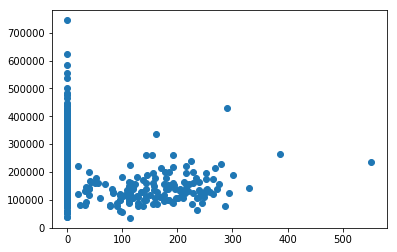

--------------------------------------------------
HalfBath


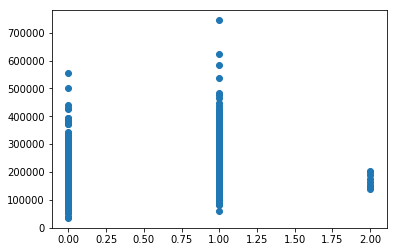

--------------------------------------------------
BsmtFinSF1


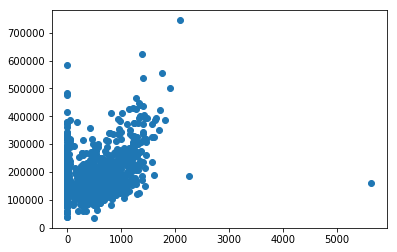

--------------------------------------------------
BsmtFullBath


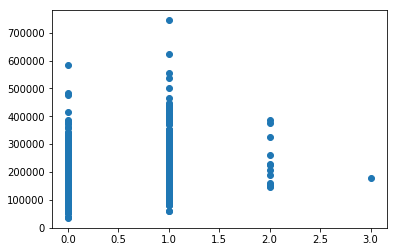

--------------------------------------------------
ScreenPorch


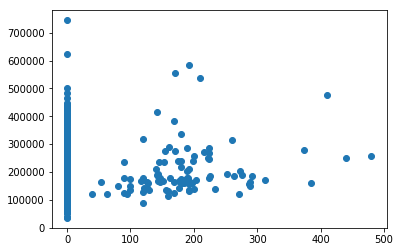

--------------------------------------------------
LotFrontage


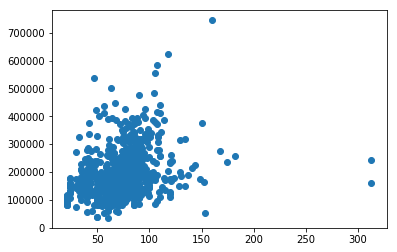

--------------------------------------------------
MSSubClass


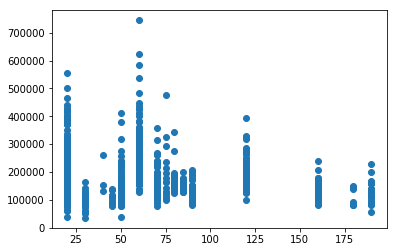

--------------------------------------------------
BsmtUnfSF


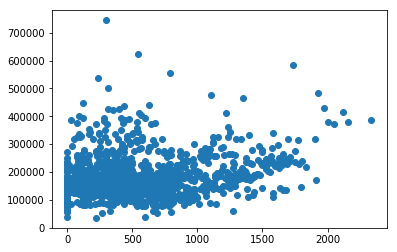

--------------------------------------------------
3SsnPorch


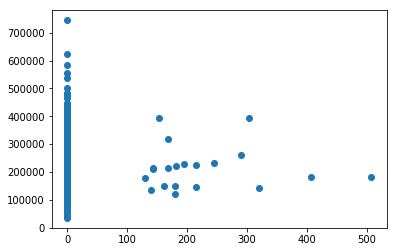

--------------------------------------------------
YearRemodAdd


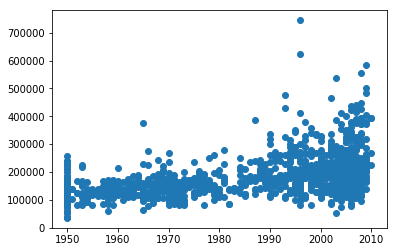

--------------------------------------------------
YrSold


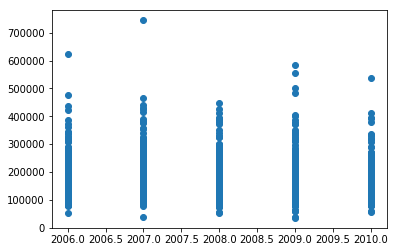

--------------------------------------------------
TotRmsAbvGrd


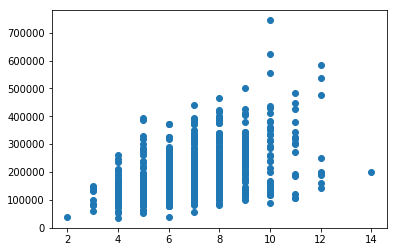

--------------------------------------------------
OverallCond


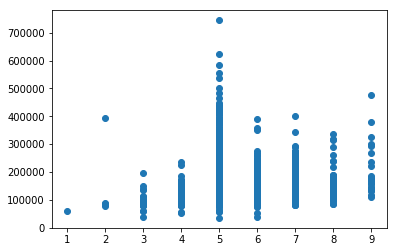

--------------------------------------------------
Fireplaces


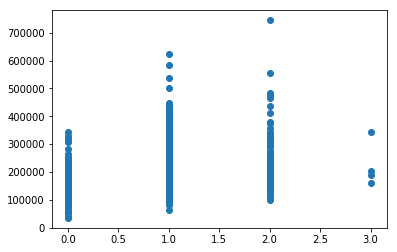

--------------------------------------------------
GarageCars


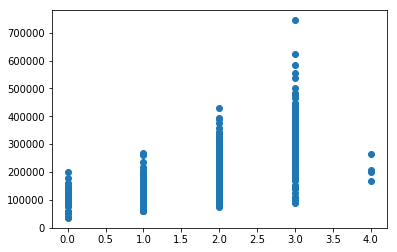

--------------------------------------------------
GarageArea


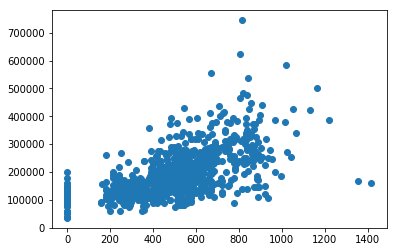

--------------------------------------------------
BsmtFinSF2


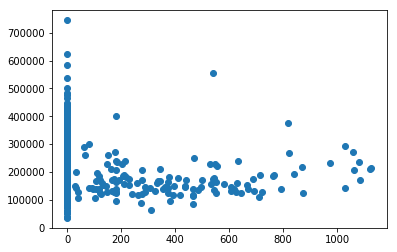

--------------------------------------------------


In [11]:
for key in not_object_cols:
    print(key)
    try:
        plt.scatter(X_train[key], y_train)
        plt.show()
    except Exception as e:
        print(e)
        print("Unable to plot")
    print("-"*50)

#### Observations
**Skewed**
* BsmtHalfBath

**Check**
* BedroomAbvGr
* HalfBath
* LotArea
* FullBath
* OverallCond
* BsmtFullBath
* Fireplaces
* WoodDeckSF 
* MoSold
* BsmtFinSF1

**Use**
* GrLivArea
* GarageCars
* LotFrontage
* OverallQual
* GarageYrBlt
* 1stFlrSF
* 2ndFlrSF
* TotRmsAbvGrd
* GarageArea
* MasVnrArea
* YearBuilt
* TotalBsmtSF

/Users/copa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


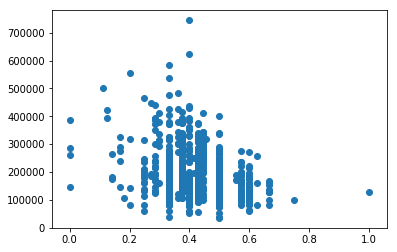

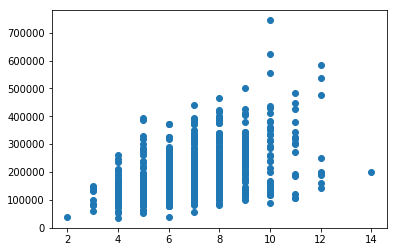

In [12]:
X_train["bedroom_per_room"] = X_train["BedroomAbvGr"]/X_train["TotRmsAbvGrd"]
plt.scatter(X_train["bedroom_per_room"], y_train)
plt.show()

plt.scatter(X_train["TotRmsAbvGrd"], y_train)
plt.show()

/Users/copa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


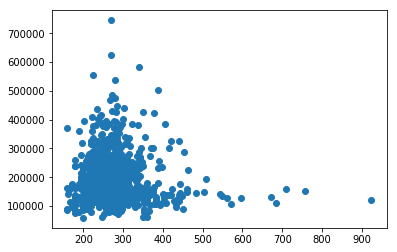

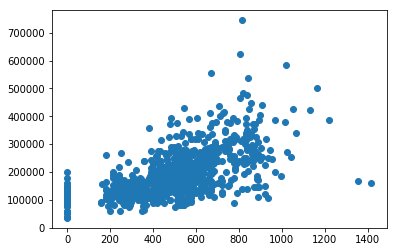

In [13]:
X_train["GarageArea_per_car"] = X_train["GarageArea"]/X_train["GarageCars"]
plt.scatter(X_train["GarageArea_per_car"], y_train)
plt.show()

plt.scatter(X_train["GarageArea"], y_train)
plt.show()

In [14]:
selected_vars = ["BldgType","HouseStyle","GrLivArea","GarageCars","LotFrontage","OverallQual","GarageYrBlt","1stFlrSF","2ndFlrSF","TotRmsAbvGrd","GarageArea","MasVnrArea","YearBuilt","TotalBsmtSF"]

In [58]:
train_data = X_train[selected_vars] 
train_data.head()

,BldgType,HouseStyle,GrLivArea,GarageCars,LotFrontage,OverallQual,GarageYrBlt,1stFlrSF,2ndFlrSF,TotRmsAbvGrd,GarageArea,MasVnrArea,YearBuilt,TotalBsmtSF
254,1Fam,1Story,1314,1,70.0,5,1957.0,1314,0,5,294,0.0,1957,1314
1066,1Fam,2Story,1571,2,59.0,6,1993.0,799,772,7,380,0.0,1993,799
638,1Fam,1Story,796,0,67.0,5,NaN,796,0,4,0,0.0,1910,796
799,1Fam,1.5Fin,1768,1,60.0,5,1939.0,981,787,7,240,252.0,1937,731
380,1Fam,1.5Fin,1691,1,50.0,5,1924.0,1026,665,6,308,0.0,1924,1026


In [59]:
le_BldgType = LabelEncoder()
le_HouseStyle = LabelEncoder()
# le_neighbor = LabelEncoder()
ohe = OneHotEncoder()

le_BldgType.fit(train_data["BldgType"])
le_HouseStyle.fit(train_data["HouseStyle"])
# ohe.fit(train_data["Neighborhood"].reshape(-1,1))
print(le_BldgType.classes_)
print(le_HouseStyle.classes_)

['1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE']
['1.5Fin' '1.5Unf' '1Story' '2.5Fin' '2.5Unf' '2Story' 'SFoyer' 'SLvl']


In [60]:
train_data["BldgType"] = le_BldgType.transform(train_data["BldgType"])
train_data["HouseStyle"] = le_HouseStyle.transform(train_data["HouseStyle"])
# train_data = pd.concat(train_data, ohe.transform(train_data["Neighborhood"]))
train_data.head()

/Users/copa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/copa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,BldgType,HouseStyle,GrLivArea,GarageCars,LotFrontage,OverallQual,GarageYrBlt,1stFlrSF,2ndFlrSF,TotRmsAbvGrd,GarageArea,MasVnrArea,YearBuilt,TotalBsmtSF
254,0,2,1314,1,70.0,5,1957.0,1314,0,5,294,0.0,1957,1314
1066,0,5,1571,2,59.0,6,1993.0,799,772,7,380,0.0,1993,799
638,0,2,796,0,67.0,5,NaN,796,0,4,0,0.0,1910,796
799,0,0,1768,1,60.0,5,1939.0,981,787,7,240,252.0,1937,731
380,0,0,1691,1,50.0,5,1924.0,1026,665,6,308,0.0,1924,1026


In [61]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 14 columns):
BldgType        1168 non-null int64
HouseStyle      1168 non-null int64
GrLivArea       1168 non-null int64
GarageCars      1168 non-null int64
LotFrontage     951 non-null float64
OverallQual     1168 non-null int64
GarageYrBlt     1104 non-null float64
1stFlrSF        1168 non-null int64
2ndFlrSF        1168 non-null int64
TotRmsAbvGrd    1168 non-null int64
GarageArea      1168 non-null int64
MasVnrArea      1162 non-null float64
YearBuilt       1168 non-null int64
TotalBsmtSF     1168 non-null int64
dtypes: float64(3), int64(11)
memory usage: 136.9 KB


#### Missings 
* LotFrontage
* GarageYrBlt
* MasVnrArea


In [62]:
train_data.describe()

,BldgType,HouseStyle,GrLivArea,GarageCars,LotFrontage,OverallQual,GarageYrBlt,1stFlrSF,2ndFlrSF,TotRmsAbvGrd,GarageArea,MasVnrArea,YearBuilt,TotalBsmtSF
count,1168.000000,1168.000000,1168.000000,1168.000000,951.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1162.000000,1168.000000,1168.000000
mean,0.478596,3.050514,1527.401541,1.781678,70.343849,6.121575,1978.662138,1169.354452,352.351027,6.561644,476.273973,103.771945,1970.965753,1061.771404
std,1.178741,1.907461,524.432686,0.740161,24.897021,1.367619,24.728938,386.675268,439.570872,1.619706,211.095373,173.032238,30.675495,440.676330
min,0.000000,0.000000,334.000000,0.000000,21.000000,1.000000,1900.000000,334.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,0.000000
25%,0.000000,2.000000,1145.750000,1.000000,59.000000,5.000000,1961.750000,888.000000,0.000000,5.000000,341.000000,0.000000,1953.000000,796.000000
50%,0.000000,2.000000,1473.000000,2.000000,70.000000,6.000000,1980.000000,1095.000000,0.000000,6.000000,482.000000,0.000000,1972.000000,997.500000
75%,0.000000,5.000000,1792.000000,2.000000,80.000000,7.000000,2002.000000,1396.750000,728.000000,7.000000,576.000000,166.000000,2001.000000,1299.250000
max,4.000000,7.000000,5642.000000,4.000000,313.000000,10.000000,2010.000000,4692.000000,2065.000000,14.000000,1418.000000,1378.000000,2010.000000,6110.000000


/Users/copa/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/copa/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([834., 165.,  85.,  37.,  25.,   9.,   4.,   2.,   0.,   1.]),
 array([   0. ,  137.8,  275.6,  413.4,  551.2,  689. ,  826.8,  964.6,
        1102.4, 1240.2, 1378. ]),
 <a list of 10 Patch objects>)

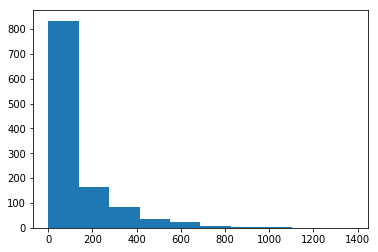

In [63]:
plt.hist(train_data['MasVnrArea'])

In [64]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

imputer.fit(train_data)
imputer.statistics_

array([   0. ,    2. , 1473. ,    2. ,   70. ,    6. , 1980. , 1095. ,
          0. ,    6. ,  482. ,    0. , 1972. ,  997.5])

In [65]:
train_data_tr = pd.DataFrame(imputer.transform(train_data))

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

In [67]:
lm = LinearRegression()
scores = cross_val_score(lm, train_data_tr, y_train, cv=10, scoring="neg_mean_squared_error")
rmse = np.mean(np.sqrt(-scores))
print(rmse)

37464.59785354616


In [68]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10)
scores = cross_val_score(rf, train_data_tr, y_train, cv=10, scoring="neg_mean_squared_error")
rmse = np.mean(np.sqrt(-scores))
print(rmse)

33618.87241711417


In [69]:
def cross_validate_model(model, data):
    scores = cross_val_score(model, data, y_train, cv=10, scoring="neg_mean_squared_error")
    rmse = np.mean(np.sqrt(-scores))
    print(rmse)

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data_tr)
train_data_scaled = scaler.transform(train_data_tr)

lm2 = LinearRegression()
rf2 = RandomForestRegressor()

cross_validate_model(lm2, train_data_scaled)
cross_validate_model(rf2, train_data_scaled)

37464.5978535461


/Users/copa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/copa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/copa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/copa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/copa/anaconda3/lib/python3.7/site-package

33901.51410752546


/Users/copa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [71]:
pd.DataFrame(train_data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03
mean,-8.528186e-16,1.027527e-16,-1.363778e-16,-3.802134e-17,-1.537013e-16,-2.560737e-16,6.499747e-16,-1.723317e-16,7.794374e-18,-1.289874e-16,4.467507e-18,-8.091416e-17,-1.404888e-15,1.906770e-16
std,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00
min,-4.061969e-01,-1.599939e+00,-2.276580e+00,-2.408179e+00,-2.194699e+00,-3.746488e+00,-3.276149e+00,-2.161277e+00,-8.019229e-01,-2.817548e+00,-2.257169e+00,-5.978887e-01,-3.227597e+00,-2.410445e+00
25%,-4.061969e-01,-5.509753e-01,-7.280534e-01,-1.056544e+00,-4.578215e-01,-8.204446e-01,-6.963549e-01,-7.279363e-01,-8.019229e-01,-9.645659e-01,-6.410937e-01,-5.978887e-01,-5.859221e-01,-6.033572e-01
50%,-4.061969e-01,-5.509753e-01,-1.037785e-01,2.950917e-01,-1.246836e-02,-8.893368e-02,5.261760e-02,-1.923741e-01,-8.019229e-01,-3.469053e-01,2.713693e-02,-5.978887e-01,3.373017e-02,-1.459097e-01
75%,-4.061969e-01,1.022470e+00,5.047584e-01,2.950917e-01,3.883495e-01,6.425772e-01,9.264188e-01,5.883308e-01,8.549472e-01,2.707553e-01,4.726240e-01,3.634694e-01,9.795152e-01,5.391266e-01
max,2.988708e+00,2.071434e+00,7.849169e+00,2.998363e+00,1.080961e+01,2.837110e+00,1.300905e+00,9.113990e+00,3.897853e+00,4.594380e+00,4.463051e+00,7.382542e+00,1.273035e+00,1.146055e+01


In [72]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(X_train["Neighborhood"])
neighborhood_encoded = pd.DataFrame(lb.transform(X_train["Neighborhood"]))
neighborhood_encoded

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [76]:
train_neigh = pd.concat([train_data_tr, neighborhood_encoded], axis=1)
train_neigh.shape

(1168, 39)

In [77]:
lm3 = LinearRegression()
rf3 = RandomForestRegressor()

cross_validate_model(lm3, train_neigh)
cross_validate_model(rf3, train_neigh)

34448.644245214455


/Users/copa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/copa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/copa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/copa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/copa/anaconda3/lib/python3.7/site-package

33109.05391891389


/Users/copa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/copa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [80]:
rf3.fit(train_neigh, y_train)

/Users/copa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [55]:
test_data = X_test[selected_vars]

In [56]:
test_data.head()

,BldgType,HouseStyle,GrLivArea,GarageCars,LotFrontage,OverallQual,GarageYrBlt,1stFlrSF,2ndFlrSF,TotRmsAbvGrd,GarageArea,MasVnrArea,YearBuilt,TotalBsmtSF
892,1Fam,1Story,1068,1,70.0,6,1963.0,1068,0,6,264,0.0,1963,1059
1105,1Fam,2Story,2622,2,98.0,8,1994.0,1500,1122,9,712,362.0,1994,1463
413,1Fam,1Story,1028,2,56.0,5,1927.0,1028,0,5,360,0.0,1927,1008
522,1Fam,1.5Fin,1664,2,50.0,6,1950.0,1004,660,7,420,0.0,1947,1004
1036,1Fam,1Story,1620,3,89.0,9,2008.0,1620,0,6,912,70.0,2007,1620


#### All transformations

In [78]:
test_data["BldgType"] = le_BldgType.transform(test_data["BldgType"])
test_data["HouseStyle"] = le_HouseStyle.transform(test_data["HouseStyle"])
test_data_tr = pd.DataFrame(imputer.transform(test_data))
neighborhood_encoded_test = pd.DataFrame(lb.transform(X_test["Neighborhood"]))
test_final = pd.concat([test_data_tr, neighborhood_encoded_test], axis=1)
test_final.shape

/Users/copa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/copa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(292, 39)

In [82]:
from sklearn.metrics import mean_squared_error
final_predictions = rf3.predict(test_final)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [84]:
print(final_rmse)

31043.280048725454


In [85]:
print(y_train)

254     145000
1066    178000
638      85000
799     175000
380     127000
303     149900
86      174000
1385    125500
265     175500
793     225000
1445    129000
808     159950
1099    157000
605     205000
701     140000
221     200000
113     217000
548     125000
1073    159500
174     184000
514      96500
1350    200000
1145    149000
965     178900
936     184900
285     164700
1310    335000
342      87500
1165    233170
31      149350
         ...  
747     265979
252     173000
21      139400
1337     52500
459     110000
1184    186700
276     201000
955     145000
1215    125000
385     192000
805     227680
1437    394617
343     266000
769     538000
1332    100000
130     226000
871     200500
1123    118000
1396    160000
87      164500
330     119000
1238    142500
466     167000
121     100000
1044    278000
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1168, dtype: int64


In [88]:
prediction_data = pd.read_csv("data/test.csv", sep=",")
prediction_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Notes.ipynb                  house_price_prediction.ipynb
Pipfile                      nohup.out
data


In [87]:
!ls data/

data_description.txt
house-prices-advanced-regression-techniques.zip
sample_submission.csv
test.csv
train.csv


In [89]:
prediction_data_selected = prediction_data[selected_vars]
prediction_data_selected["BldgType"] = le_BldgType.transform(prediction_data_selected["BldgType"])
prediction_data_selected["HouseStyle"] = le_HouseStyle.transform(prediction_data_selected["HouseStyle"])
prediction_data_transformed = pd.DataFrame(imputer.transform(prediction_data_selected))
neighborhood_encoded_test = pd.DataFrame(lb.transform(prediction_data["Neighborhood"]))
treated_pred_data = pd.concat([prediction_data_transformed, neighborhood_encoded_test], axis=1)
treated_pred_data.shape

/Users/copa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/copa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(1459, 39)

In [97]:
out = pd.DataFrame(rf3.predict(treated_pred_data))

In [98]:
out

,0
0,135810.0
1,141400.0
2,155195.3
3,181730.0
4,241550.0
5,193250.0
6,172503.2
7,176089.0
8,182936.4
9,108805.0


In [99]:
out_df = pd.concat([pd.DataFrame(prediction_data["Id"]), out], axis=1)

In [100]:
out_df.to_csv("predictions.csv", sep=",")

In [101]:
!ls

Notes.ipynb                  house_price_prediction.ipynb
Pipfile                      nohup.out
data                         predictions.csv
